# Prediction of Species based on the lenth and width data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

- There are around 150 dataset.

- Namely sepal_length , sepal_width, petal_length, petal_width which are independent variable and species as dependent variable

- based on the above 4 independent variable we need to build the model to predict Species

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- There are no Null Values in the Dataset

In [7]:
def unique_count(df):
    summary=pd.DataFrame(df.dtypes,columns=['dtype'])
    summary=summary.reset_index()
    summary['features']=summary['index']
    summary=summary[['features','dtype']]
    summary['No of Unique Features']=df.nunique().values
    return summary

unique_count(df)

,features,dtype,No of Unique Features
0,sepal_length,float64,35
1,sepal_width,float64,23
2,petal_length,float64,43
3,petal_width,float64,22
4,species,object,3


In [8]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

- There are 3 categorical dependent variable namely  'setosa', 'versicolor', 'virginica'

# Categorising the data into Numerical and Categorical Features

In [12]:
num_feat=[features for features in df.columns if df[features].dtype!='O']
cat_feat=[features for features in df.columns if df[features].dtype=='O' ]

print('There are {} Numerical Features Namely : {}'.format(len(num_feat), num_feat))
print('There are {} Categorical Features Namely :{}'.format(len(cat_feat), cat_feat))

There are 4 Numerical Features Namely : ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
There are 1 Categorical Features Namely :['species']


# Univariate Analysis of Numerical and Categorical Features

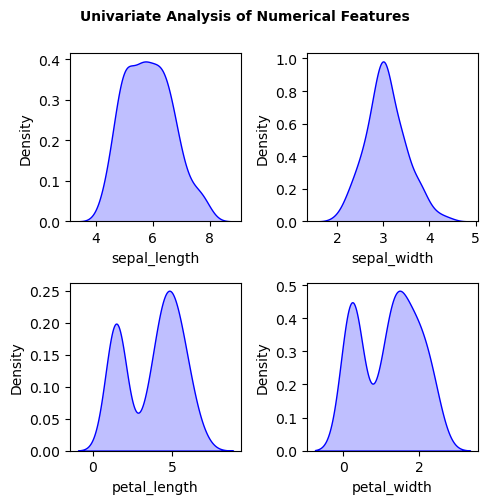

In [21]:
plt.figure(figsize=(5,5))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=10, fontweight='bold', y=1)

for i in range(0,len(num_feat)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[num_feat[i]], shade=True, color='b')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

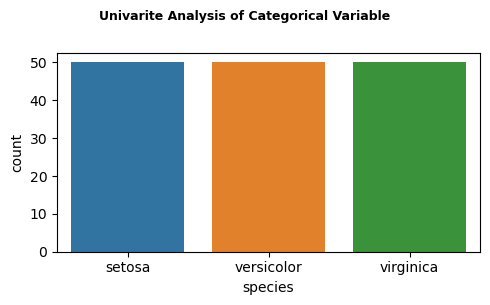

In [32]:
plt.figure(figsize=(5,3))
plt.suptitle('Univarite Analysis of Categorical Variable', fontsize=9, fontweight='bold', y=1)

for i in range(0,len(cat_feat)):
    plt.subplot(1,1,i+1)
    sns.countplot(x=df[cat_feat[i]])
    plt.xlabel(cat_feat[i])
    plt.tight_layout()

In [25]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

###### The output variable which is dependent variable the data is equily distributed

# Box Plot to find Outliers

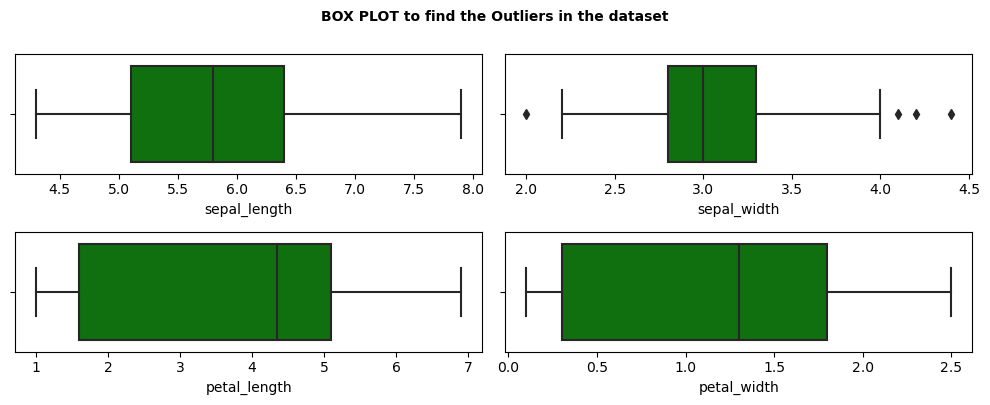

In [31]:
plt.figure(figsize=(10,4))
plt.suptitle('BOX PLOT to find the Outliers in the dataset', fontsize=10, fontweight='bold',y=1)

for i in range(0,len(num_feat)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[num_feat[i]],color='g')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

##  converting the catagorical features into numerical features using map function

In [33]:
species_map={'setosa':1, 'versicolor':2, 'virginica':3}
df['species']=df['species'].map(species_map)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
species,150.0,2.000000,0.819232,1.0,1.0,2.00,3.0,3.0


<Axes: >

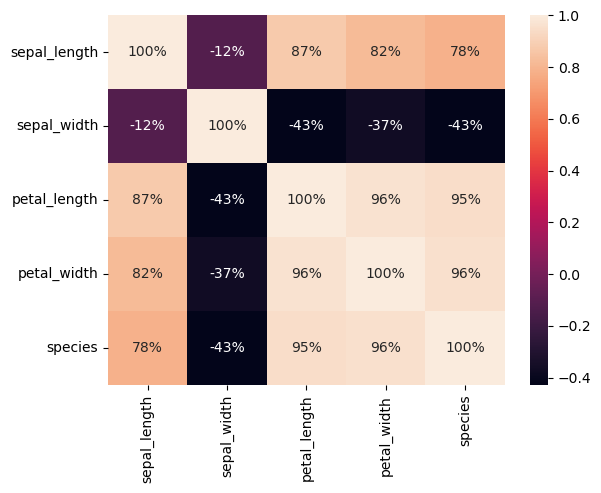

In [43]:
sns.heatmap(data=df.corr(),annot=True, fmt='0.0%')

# Spliting the dataset into X and Y variable

In [46]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [77]:
df['species'].unique()

array([1, 2, 3], dtype=int64)

In [47]:
X.shape,y.shape

((150, 4), (150,))

# Dividing the data into Train and Test  

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=9)

In [50]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [79]:
y_test

135    3
90     2
145    3
147    3
60     2
37     1
26     1
3      1
75     2
9      1
25     1
73     2
98     2
94     2
39     1
81     2
31     1
55     2
101    3
47     1
28     1
27     1
111    3
20     1
118    3
89     2
43     1
144    3
8      1
137    3
Name: species, dtype: int64

# Model Building

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, classification_report, confusion_matrix

In [95]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_test)


accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='micro')
recall=recall_score(y_test,y_pred,average='micro')
f1=f1_score(y_test,y_pred,average='micro')
confusion=confusion_matrix(y_test,y_pred)

print(f'Accuracy:{accuracy:0.2f}')
print(f'Precision:{precision:0.2f}')
print(f'Recall:{recall:0.2f}')
print(f'F1_Score:{f1:0.2f}')
print(confusion)



Accuracy:1.00
Precision:1.00
Recall:1.00
F1_Score:1.00
[[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]


In [90]:
models={'LogisticRegression':LogisticRegression(),
       'KNeighborsClassifier':KNeighborsClassifier(),
       'DecisionTreeClassifier':DecisionTreeClassifier(),
       'RandomForestClassifier':RandomForestClassifier(),
       'AdaBoostClassifier':AdaBoostClassifier(),
       'CatBoostClassifier':CatBoostClassifier(),
       'GradientBoostingClassifier':GradientBoostingClassifier(),
       'naive_bayes':GaussianNB(),
       'Support_vector_Cllassifier':SVC()}

def evaluation(true,predict):
    accuracy=accuracy_score(true,predict)
    precision=precision_score(true,predict,average='micro')
    recall=recall_score(true,predict,average='micro')
    f1=f1_score(true,predict,average='micro')
    confusion=confusion_matrix(true,predict)
    return accuracy,precision, recall, f1,confusion

result={}

for name ,model in models.items():
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    accuracy,precision, recall, f1,confusion = evaluation(y_test,y_pred)
    
    result[name]={'Accuracy': accuracy,
                 'Precision':precision,
                 'Recall': recall,
                 'F1': f1,
                 'Confusion':confusion}
    
    print(f'{name}:')
    print(f'Accuracy:{accuracy:0.2f}')
    print(f'Precision:{precision:0.2f}')
    print(f'Recall:{recall:0.2f}')
    print(f'F1_Score:{f1:0.2f}')
    print('Confusion_Matrix:\n',confusion)

LogisticRegression:
Accuracy:1.00
Precision:1.00
Recall:1.00
F1_Score:1.00
Confusion_Matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
KNeighborsClassifier:
Accuracy:1.00
Precision:1.00
Recall:1.00
F1_Score:1.00
Confusion_Matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
DecisionTreeClassifier:
Accuracy:1.00
Precision:1.00
Recall:1.00
F1_Score:1.00
Confusion_Matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
RandomForestClassifier:
Accuracy:1.00
Precision:1.00
Recall:1.00
F1_Score:1.00
Confusion_Matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
AdaBoostClassifier:
Accuracy:1.00
Precision:1.00
Recall:1.00
F1_Score:1.00
Confusion_Matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
Learning rate set to 0.071017
0:	learn: 1.0170840	total: 1.82ms	remaining: 1.82s
1:	learn: 0.9510271	total: 3.14ms	remaining: 1.56s
2:	learn: 0.8915461	total: 4.43ms	remaining: 1.47s
3:	learn: 0.8396298	total: 6.11ms	remaining: 1.52s
4:	learn: 0.7932280	total: 7.74ms	remaining: 1.54s
5:	learn: 0.7404667	total: 9.62ms	remaining: 1.59s